In [1]:
import matplotlib as mpl; mpl.use('pgf')

In [2]:
%matplotlib inline

In [3]:
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
golden_ratio = 0.5 * (1 + np.sqrt(5))
golden_size = lambda width: (width, width / golden_ratio)

In [21]:
width_pt = 3 * 234.8775 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27 # Convert pt to inches
width = width_pt * inches_per_pt # width in inches

rc = {
    "figure.figsize": golden_size(width),
    "font.serif": ['Times New Roman'],
    "text.usetex": False,
}

sns.set(context="notebook", style="ticks", palette="colorblind", font="serif", rc=rc)

In [22]:
import os

In [23]:
def make_plot_data(names, summary_dir, pretty_name_mapping=None):

    df_list = []

    for name in names:

        csv_path = os.path.join(summary_dir, f"{name}.csv")

        df = pd.read_csv(csv_path)
        df_list.append(df)

    data = pd.concat(df_list, axis="index", sort=True)

    if pretty_name_mapping is not None:
        data = data.assign(name=data.name.replace(pretty_name_mapping))

    return data

In [38]:
names = []
names.extend(["beta-0.9-{:d}".format(run) for run in range(1, 4)])
# names.extend(["lr-1e-3-beta-0.9-{:d}".format(run) for run in range(1, 4)])
names.extend(["default{:d}".format(run) for run in range(1, 4)])
names

['beta-0.9-1', 'beta-0.9-2', 'beta-0.9-3', 'default1', 'default2', 'default3']

In [39]:
data = make_plot_data(names=names, summary_dir="../logs")
data

,amplitude,epoch,learning_rate,length_scale,name,nll,observation_noise_variance,seed
0,1.000000,0,0.01,0.367879,beta-0.9-1,208.601515,0.006738,42
1,1.010050,1,0.01,0.364219,beta-0.9-1,204.529570,0.006806,42
2,1.020200,2,0.01,0.360595,beta-0.9-1,200.498438,0.006874,42
3,1.030450,3,0.01,0.357006,beta-0.9-1,196.508696,0.006943,42
4,1.040800,4,0.01,0.353453,beta-0.9-1,192.561363,0.007013,42
...,...,...,...,...,...,...,...,...
495,0.937110,495,0.01,0.081234,default3,8.069533,0.012032,42
496,0.936505,496,0.01,0.081195,default3,8.066937,0.012015,42
497,0.935912,497,0.01,0.081157,default3,8.064347,0.011998,42
498,0.935330,498,0.01,0.081119,default3,8.061764,0.011981,42


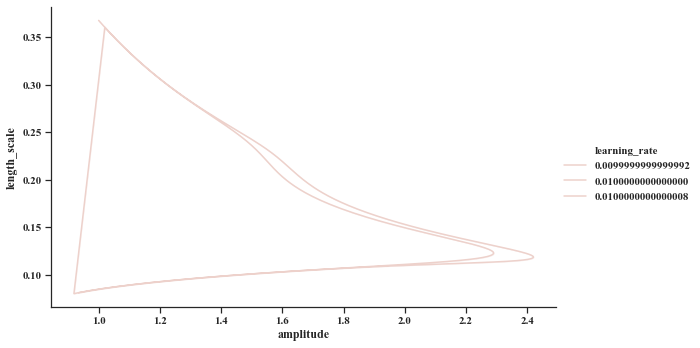

In [40]:
g = sns.relplot(x="amplitude", y="length_scale", hue="learning_rate",
                sort=False, height=5, aspect=golden_ratio,
                data=data, kind="line")